In [29]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import os

In [48]:
# dataset

#https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset

In [30]:
img_size=256
batch_size=32
channels=3

In [31]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("C:\\Users\\varsh\\Downloads\\archive (10)\\Dataset_BUSI_with_GT",shuffle=True,image_size=(img_size,img_size),batch_size=batch_size)


Found 780 files belonging to 3 classes.


In [32]:
class_names=dataset.class_names
n_classes=len(class_names)
print(class_names)

['benign', 'malignant', 'normal']


In [33]:
len(dataset)
# since, 32*36

25

In [34]:
for img_batch, label_batch in dataset.take(1):
    print(img_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 2 1 1 2 2 0 1 2 2 0 0 2 0 1 0 2]


In [35]:
def get_dataset_partition_tf(ds,train_split=0.8, test_split=0.1, val_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    
    train_size=int(train_split*ds_size)
    val_size=int(val_split * ds_size)
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).take(val_size)    
    
    return train_ds,test_ds,val_ds

In [36]:
train,test,val=get_dataset_partition_tf(dataset)

In [37]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1.0/255),
    layers.experimental.preprocessing.Resizing(img_size,img_size)
])


In [38]:
data_agumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [39]:
img_shape=(batch_size, img_size, img_size, channels)

model=models.Sequential([
    resize_and_rescale,
    data_agumentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=img_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

model.build(input_shape=img_shape)

In [40]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_5 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [41]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [42]:
history= model.fit(train, epochs=25, batch_size=batch_size, verbose=1, validation_data=val)

Epoch 1/25
20/20 [==============================] - 20s 896ms/step - loss: 1.1766 - accuracy: 0.5468 - val_loss: 0.9405 - val_accuracy: 0.5469
Epoch 2/25
20/20 [==============================] - 20s 941ms/step - loss: 0.9978 - accuracy: 0.5548 - val_loss: 0.9370 - val_accuracy: 0.5781
Epoch 3/25
20/20 [==============================] - 20s 949ms/step - loss: 0.9389 - accuracy: 0.5790 - val_loss: 0.9449 - val_accuracy: 0.5781
Epoch 4/25
20/20 [==============================] - 20s 946ms/step - loss: 0.8907 - accuracy: 0.6161 - val_loss: 0.8394 - val_accuracy: 0.6094
Epoch 5/25
20/20 [==============================] - 20s 986ms/step - loss: 0.9178 - accuracy: 0.6210 - val_loss: 0.8702 - val_accuracy: 0.6406
Epoch 6/25
20/20 [==============================] - 21s 1s/step - loss: 0.8721 - accuracy: 0.6323 - val_loss: 0.7228 - val_accuracy: 0.7188
Epoch 7/25
20/20 [==============================] - 22s 1s/step - loss: 0.8957 - accuracy: 0.6094 - val_loss: 0.8464 - val_accuracy: 0.6406
Epoch

In [43]:
scores=model.evaluate(test)

2/2 [==============================] - 2s 226ms/step - loss: 0.5772 - accuracy: 0.7344


In [44]:
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

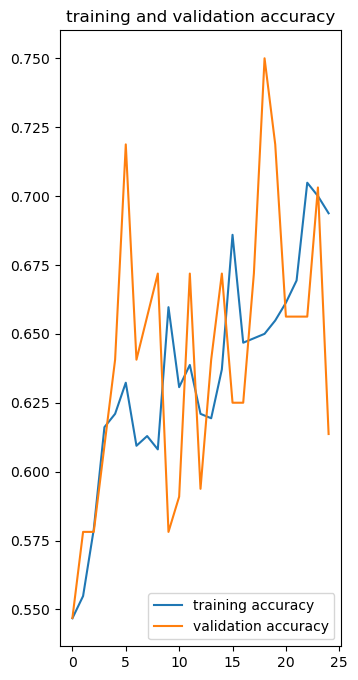

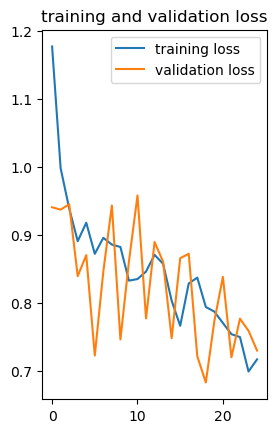

In [45]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(25), acc, label='training accuracy')
plt.plot(range(25), val_acc, label='validation accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')
plt.show()

plt.subplot(1,2,2)
plt.plot(range(25), loss, label='training loss')
plt.plot(range(25), val_loss, label='validation loss')
plt.legend(loc='upper right')
plt.title('training and validation loss')
plt.show()

In [46]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0) #create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])),2)
    
    return predicted_class, confidence

1/1 [==============================] - 0s 26ms/step


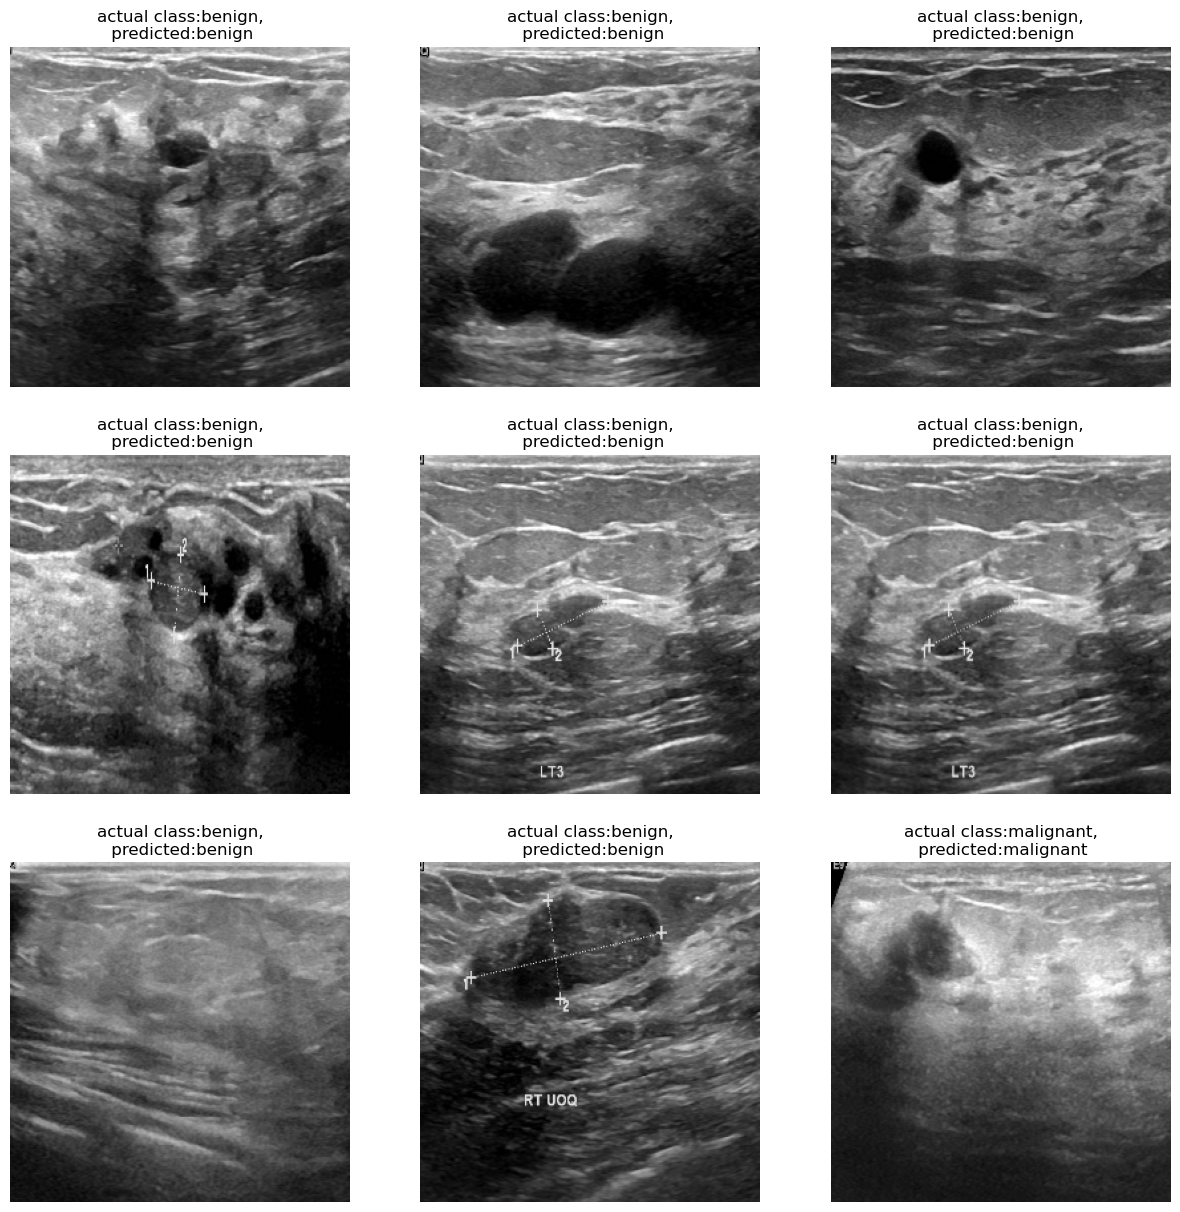

In [47]:
import numpy as np
plt.figure(figsize=(15,15))
for images, labels in test.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"actual class:{actual_class},\n predicted:{predicted_class}")
        
        plt.axis("off")